## Task 3: Predicting Customer Churn for GlobalMart. 
The goal is to predict which customers are likely to churn (leave the service) using a classification model, enabling targeted retention strategies.

 **Step 1**. Preprocessing: Clean the data and convert categorical features into numerical 
format (using One-Hot Encoding or Label Encoding). 

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows to understand the data
df.head()

# Convert 'TotalCharges' to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN in 'TotalCharges' (there are a few)
df.dropna(subset=['TotalCharges'], inplace=True)

# Drop 'customerID' as it's not useful for prediction
df.drop('customerID', axis=1, inplace=True)

# Encode the target variable 'Churn' using LabelEncoder (No=0, Yes=1)
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

# Identify categorical columns (all object types)
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display info after preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   PhoneService_Yes                       7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  InternetS

**Step 2** Train-Test Split: Split your data into training and testing sets. 

In [3]:
# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (5625, 30)
X_test shape: (1407, 30)


**Step 3.** Model Training: Train a simple yet powerful Logistic Regression model.

In [9]:
# Initialize and train the model
model = LogisticRegression(max_iter=2000, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='liblinear')

**Step 4.** Evaluation: Evaluate your model using Accuracy and a Confusion Matrix. 

Accuracy: 0.7875
Confusion Matrix:
[[918 115]
 [184 190]]


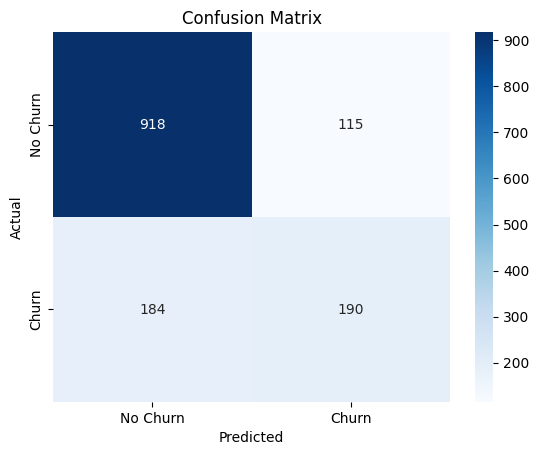

In [10]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Interpretation of Confusion Matrix

**True Negatives (TN)**: 918 (correctly predicted "No Churn").

**False Positives (FP)**: 115 (incorrectly predicted as "Churn" but stayed).

**False Negatives (FN)**: 184 (incorrectly predicted as "No Churn" but churned).

**True Positives (TP)**: 190 (correctly predicted "Churn").


### How to Use This

1. **Jupyter Notebook**:
   - Create a new Jupyter Notebook.
   - Copy and paste the Markdown content above into a `.md` file or directly into Jupyter cells.
   - Separate the content into Markdown cells (for text and headers) and Code cells (for Python code). In Jupyter, you can switch cell types using the dropdown (Markdown for text, Code for Python).
   - Ensure the CSV file (`WA_Fn-UseC_-Telco-Customer-Churn.csv`) is in the same directory as the notebook.
   - Run the cells sequentially to execute the analysis.

2. **Markdown File**:
   - Save the content above as `churn_prediction.md`.
   - View it in a Markdown viewer or editor (e.g., VS Code, GitHub, or Jupyter Lab’s Markdown preview).
   - To execute the code, you’ll need to copy the code blocks into a Jupyter Notebook or Python environment.

3. **Dependencies**:
   - Ensure you have the required libraries installed: `pandas`, `scikit-learn`, `seaborn`, and `matplotlib`. Install them using:
     ```bash
     pip install pandas scikit-learn seaborn matplotlib